In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_recall_curve, roc_curve, det_curve
from sklearn.model_selection import cross_validate

In [2]:
def scorer(clf, X, y):
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    matthews = matthews_corrcoef(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    vals = print("\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\nMatthews_Correlation_Coefficient={:0.3f}\nROC_AUC = {:0.3f}".format(
        accuracy,precision,recall,f1, matthews, roc_auc))
    return vals

In [3]:
cbe_SMOTE_train = pd.read_csv('cbe_SMOTE_train.csv', index_col = 'Unnamed: 0')
cbe_SMOTEENN_train = pd.read_csv('cbe_SMOTEENN_train.csv', index_col = 'Unnamed: 0')

binary_SMOTE_train = pd.read_csv('binary_SMOTE_train.csv', index_col = 'Unnamed: 0')
#binary_SMOTEENN_train = pd.read_csv('binary_SMOTEENN_train.csv')

test_binary = pd.read_csv('test_binary.csv', index_col = 'Unnamed: 0')
test_cbe = pd.read_csv('test_cbe.csv', index_col = 'Unnamed: 0')

In [4]:
#ratios

#catboost encoded
print(len(cbe_SMOTE_train.index),':', len(test_cbe.index))
print(len(cbe_SMOTEENN_train.index),':', len(test_cbe.index))

#binary encoded
print(len(binary_SMOTE_train.index),':', len(test_binary.index))

1289206 : 277860
1227873 : 277860
1289206 : 277860


# 

In [5]:
cbe_SMOTE_train.head()

amt  city_pop      time    distance    cc_num  merchant  category  \
0  60.85    276002  1.560192   69.034830  0.004363  0.001238  0.001608   
1  80.29    116001  1.587067  106.847670  0.000002  0.003079  0.002114   
2  76.72       493  1.554160   53.404865  0.008596  0.001638  0.001608   
3  53.58        76  1.572842   95.372180  0.003800  0.003174  0.004694   
4  52.99       498  1.592052   89.384020  0.003907  0.002626  0.002114   

     street      city     state       zip       job  identifiers  is_fraud  
0  0.004363  0.006979  0.006585  0.004982  0.003374     0.004363         0  
1  0.000002  0.000002  0.005362  0.000002  0.000002     0.000002         0  
2  0.008596  0.008596  0.007448  0.008596  0.005492     0.008596         0  
3  0.003800  0.003800  0.005149  0.003800  0.004990     0.003800         0  
4  0.003907  0.003907  0.005049  0.003907  0.005133     0.003907         0

In [6]:
cbe_SMOTEENN_train.head()

amt  city_pop      time    distance    cc_num  merchant  category  \
0  60.85    276002  1.560192   69.034830  0.004363  0.001238  0.001608   
1  80.29    116001  1.587067  106.847670  0.000002  0.003079  0.002114   
2  76.72       493  1.554160   53.404865  0.008596  0.001638  0.001608   
3  53.58        76  1.572842   95.372180  0.003800  0.003174  0.004694   
4  52.99       498  1.592052   89.384020  0.003907  0.002626  0.002114   

     street      city     state       zip       job  identifiers  is_fraud  
0  0.004363  0.006979  0.006585  0.004982  0.003374     0.004363         0  
1  0.000002  0.000002  0.005362  0.000002  0.000002     0.000002         0  
2  0.008596  0.008596  0.007448  0.008596  0.005492     0.008596         0  
3  0.003800  0.003800  0.005149  0.003800  0.004990     0.003800         0  
4  0.003907  0.003907  0.005049  0.003907  0.005133     0.003907         0

In [7]:
binary_SMOTE_train.head()

amt  city_pop      time    distance  cc_num_0  cc_num_1  cc_num_2  \
0  60.85    276002  1.560192   69.034830         0         0         0   
1  80.29    116001  1.587067  106.847670         1         0         1   
2  76.72       493  1.554160   53.404865         0         1         1   
3  53.58        76  1.572842   95.372180         0         0         1   
4  52.99       498  1.592052   89.384020         0         1         0   

   cc_num_3  cc_num_4  cc_num_5  ...  identifiers_1  identifiers_2  \
0         1         0         0  ...              0              0   
1         0         0         1  ...              0              1   
2         0         1         1  ...              1              1   
3         1         1         0  ...              0              1   
4         0         0         1  ...              1              0   

   identifiers_3  identifiers_4  identifiers_5  identifiers_6  identifiers_7  \
0              1              0              0              0              1   
1              0              0              1              0              0   
2              0              1              1              1              1   
3              1              1              0              0              0   
4              0              0              1              1              0   

   identifiers_8  identifiers_9  is_fraud  
0              1              0         0  
1              1              1         0  
2              1              1         0  
3              1              1         0  
4              1              1         0  

[5 rows x 84 columns]

In [8]:
test_binary.head()

amt  city_pop      time    distance  cc_num_0  cc_num_1  cc_num_2  \
166897   39.81      4056  1.597757   49.801727         0         0         1   
547088    9.75     79613  1.609261   92.707621         1         0         1   
198253  117.42       376  1.598779  103.389304         0         1         1   
57234    56.43       471  1.594463   65.796234         0         0         0   
679       7.10       106  1.592755   98.593753         0         0         1   

        cc_num_3  cc_num_4  cc_num_5  ...  identifiers_1  identifiers_2  \
166897         0         0         1  ...              0              1   
547088         0         1         0  ...              0              1   
198253         1         0         1  ...              1              1   
57234          0         0         1  ...              0              0   
679            1         1         0  ...              0              1   

        identifiers_3  identifiers_4  identifiers_5  identifiers_6  \
166897              0              0              1              0   
547088              0              1              0              1   
198253              1              0              1              1   
57234               0              0              1              1   
679                 1              1              0              0   

        identifiers_7  identifiers_8  identifiers_9  is_fraud  
166897              0              0              1         0  
547088              0              0              0         0  
198253              1              0              1         0  
57234               1              0              0         0  
679                 0              1              0         0  

[5 rows x 84 columns]

In [9]:
test_cbe.head()

amt  city_pop      time    distance    cc_num  merchant  category  \
166897   39.81      4056  1.597757   49.801727  0.000002  0.001662  0.001651   
547088    9.75     79613  1.609261   92.707621  0.005284  0.004793  0.007225   
198253  117.42       376  1.598779  103.389304  0.000003  0.003709  0.002478   
57234    56.43       471  1.594463   65.796234  0.007302  0.004040  0.004694   
679       7.10       106  1.592755   98.593753  0.003901  0.005077  0.002864   

          street      city     state       zip       job  identifiers  \
166897  0.000002  0.000002  0.006647  0.000002  0.004500     0.000002   
547088  0.005284  0.005193  0.006585  0.005284  0.002915     0.005284   
198253  0.000003  0.000003  0.005172  0.000003  0.001459     0.000003   
57234   0.007302  0.007302  0.005693  0.007302  0.010644     0.007302   
679     0.003901  0.003901  0.005049  0.003901  0.009693     0.003901   

        is_fraud  
166897         0  
547088         0  
198253         0  
57234          0  
679            0

# Modelling
## Model Used - `Random Forest Classifier`

## Classifier Order
* `clf1` - CatBoost Encoding with SMOTE Resampling
* `clf2` - Binary Encoding with SMOTE Resampling
##### 
* `clf3` - CatBoost Encoding with SMOTEENN Resampling

## `SMOTE`

### `CatBoost Encoded`

In [28]:
X_train_cbe = cbe_SMOTE_train.drop(columns = 'is_fraud')
X_test_cbe = test_cbe.drop(columns = 'is_fraud')
y_train_cbe = cbe_SMOTE_train['is_fraud']
y_test_cbe = test_cbe['is_fraud']

In [29]:
clf1 = RandomForestClassifier(n_estimators = 100, random_state = 1015)
clf1.fit(X_train_cbe, y_train_cbe.ravel())
print("Train Dataset Scores as follows:\n")
scorer(clf1, X_train_cbe, y_train_cbe.ravel())

Train Dataset Scores as follows:


Accuracy=1.000
Precision=1.000
Recall=1.000
F1 Score=1.000
Matthews_Correlation_Coefficient=1.000
ROC_AUC = 1.000


In [30]:
print("Test Scores as follows:\n")
scorer(clf1, X_test_cbe, y_test_cbe)

Test Scores as follows:


Accuracy=0.996
Precision=0.253
Recall=0.019
F1 Score=0.036
Matthews_Correlation_Coefficient=0.069
ROC_AUC = 0.510


In [31]:
estimator1 = clf1.estimators_[5]

In [33]:
from sklearn.tree import export_graphviz
export_graphviz(estimator1, 
                out_file='tree.dot', 
                feature_names = X_train_cbe.columns,
                class_names = y_train_cbe.name,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

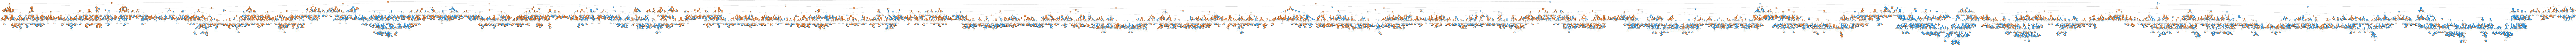

In [39]:
from IPython.display import Image
Image(filename = 'tree.png')

# Looks messy right?
### Maybe, we can try changing parameters to get a fraction of the tree

In [40]:
clf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1015,
 'verbose': 0,
 'warm_start': False}

In [41]:
#reducing n_estimators and limiting max_depth to 5
clf1_limited = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state = 1015)
clf1_limited.fit(X_train_cbe, y_train_cbe.ravel())

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1015)

In [44]:
estimator2 = clf1_limited.estimators_[5]
export_graphviz(estimator2, 
                out_file='tree2.dot', 
                feature_names = X_train_cbe.columns,
                class_names = y_train_cbe.name,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

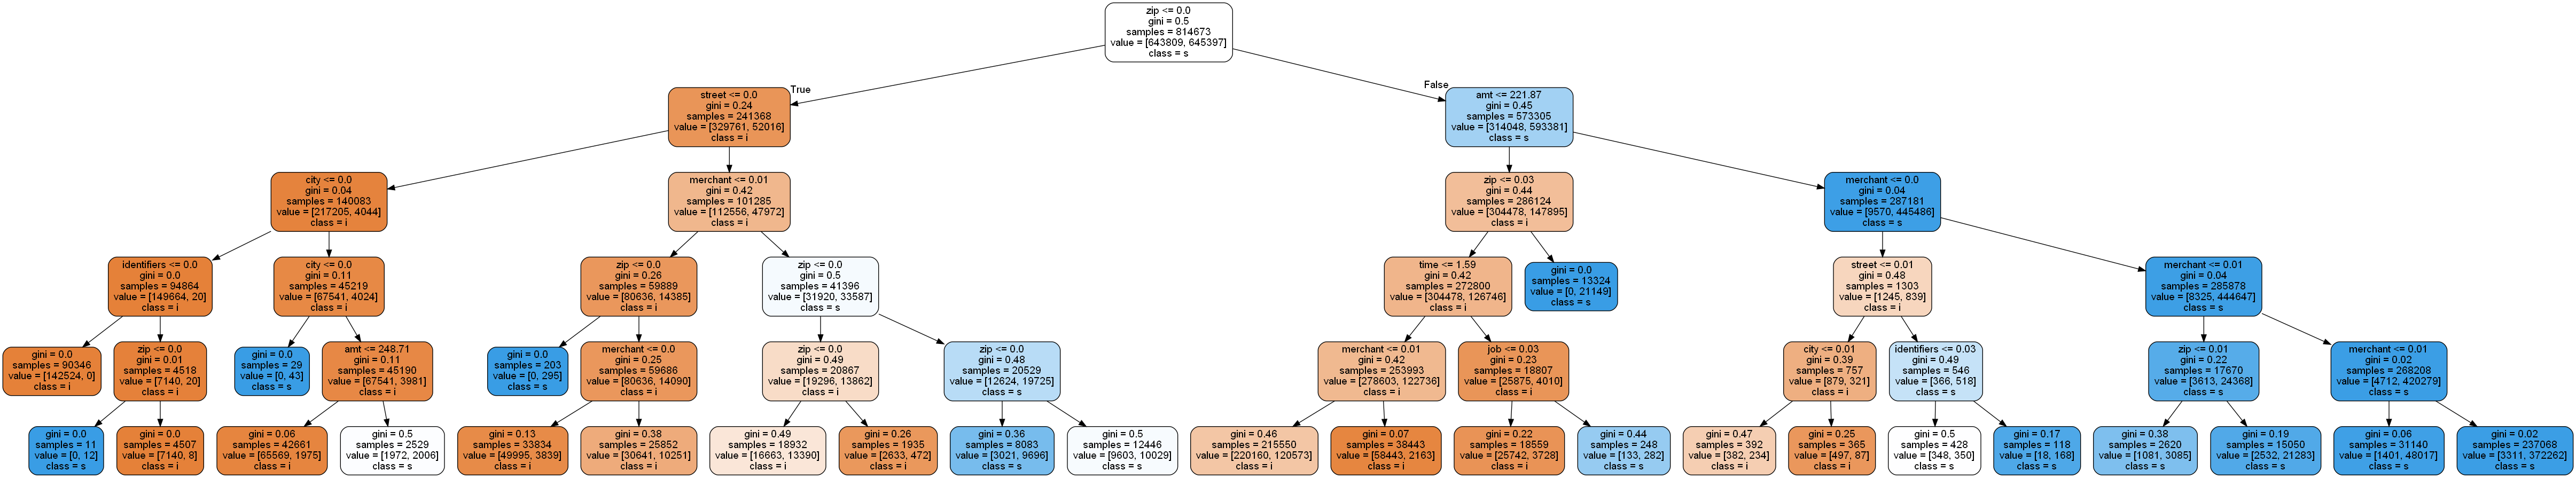

In [45]:
Image(filename = 'tree2.png')

# Classifying CatBoost Encoded & SMOTEENN Resampled

In [46]:
X_train_cbe_SMOTEENN = cbe_SMOTEENN_train.drop(columns = 'is_fraud')
X_test_cbe = test_cbe.drop(columns = 'is_fraud')
y_train_cbe_SMOTEENN = cbe_SMOTEENN_train['is_fraud']
y_test_cbe = test_cbe['is_fraud']

In [48]:
%%time
clf2 = RandomForestClassifier(n_estimators = 100, random_state = 1015)
clf2.fit(X_train_cbe_SMOTEENN, y_train_cbe_SMOTEENN.ravel())

CPU times: total: 5min 34s
Wall time: 5min 34s


RandomForestClassifier(random_state=1015)

In [49]:
print("Train Dataset Scores as follows:\n")
scorer(clf2, X_train_cbe_SMOTEENN, y_train_cbe_SMOTEENN.ravel())

print("Test Dataset Scores as follows:\n")
scorer(clf2, X_test_cbe, y_test_cbe.ravel())

Train Dataset Scores as follows:


Accuracy=1.000
Precision=1.000
Recall=1.000
F1 Score=1.000
Matthews_Correlation_Coefficient=1.000
ROC_AUC = 1.000
Test Dataset Scores as follows:


Accuracy=0.995
Precision=0.137
Recall=0.059
F1 Score=0.083
Matthews_Correlation_Coefficient=0.088
ROC_AUC = 0.529


In [50]:
#visualizing the random forest tree
clf2_limited = clf2.set_params(n_estimators = 50, max_depth = 5, random_state = 1015)
clf2_limited.fit(X_train_cbe_SMOTEENN, y_train_cbe_SMOTEENN.ravel())
estimator3 = clf2_limited.estimators_[5]

In [62]:
export_graphviz(estimator3, 
                out_file='tree3.dot', 
                feature_names = X_train_cbe.columns,
                class_names = y_train_cbe.name,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

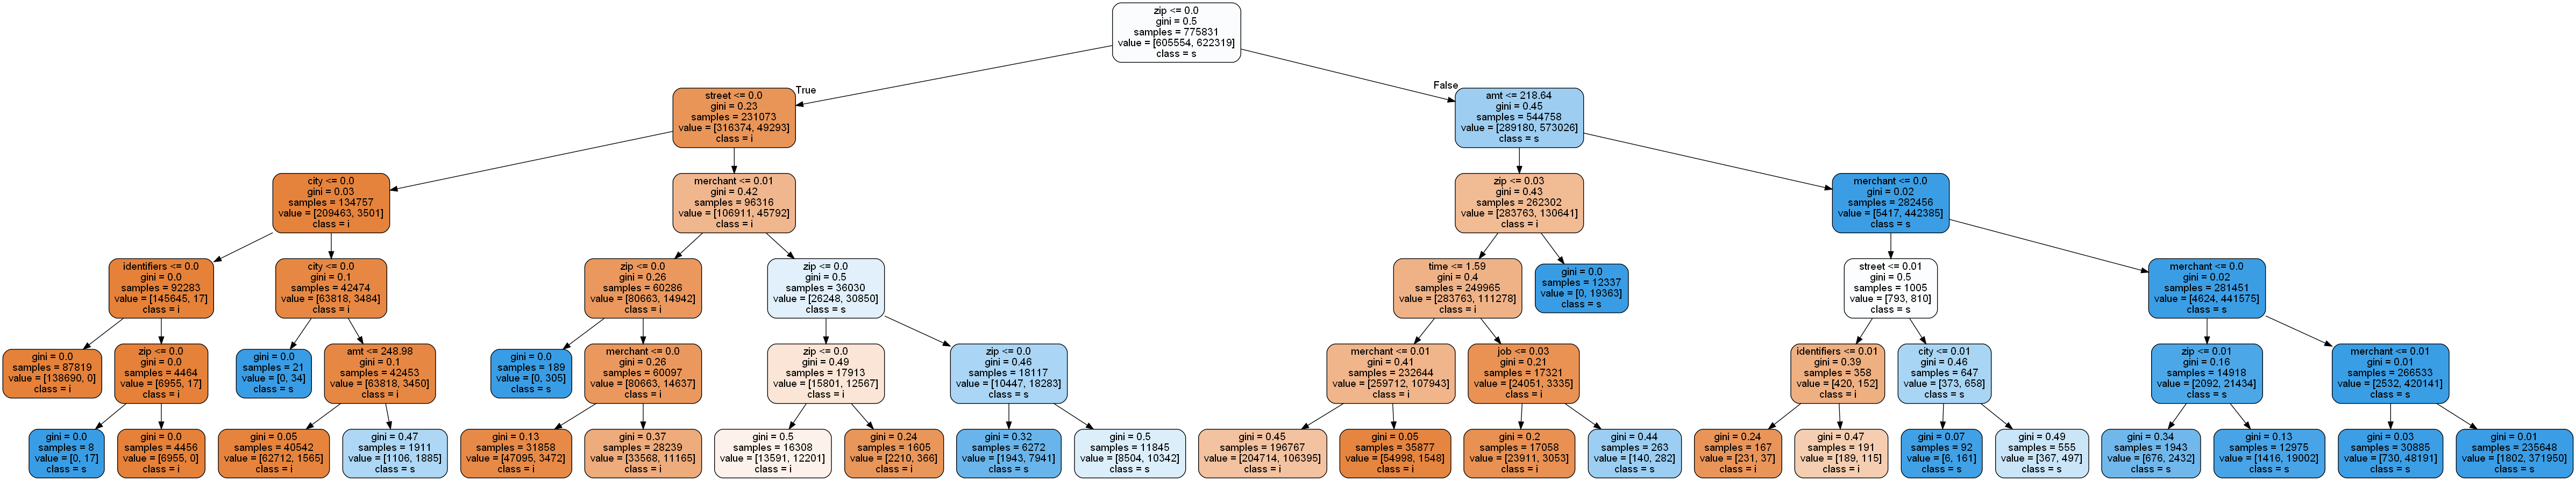

In [63]:
Image(filename = 'tree3.png')

# Classifying Binary Encoded & SMOTE Resampled

In [60]:
X_train_binary = binary_SMOTE_train.drop(columns = 'is_fraud')
X_test_binary = test_binary.drop(columns = 'is_fraud')
y_train_binary = binary_SMOTE_train['is_fraud']
y_test_binary = test_binary['is_fraud']

In [58]:
%%time
clf3 = RandomForestClassifier(n_estimators = 100, random_state = 1015)
clf3.fit(X_train_binary, y_train_binary)

CPU times: total: 3min 55s
Wall time: 3min 55s


RandomForestClassifier(random_state=1015)

In [67]:
print("Train Dataset Scores as follows:\n")
scorer(clf3, X_train_binary, y_train_binary)
print("\n","\n",'\n')
print("Test Dataset Scores as follows:\n")
scorer(clf3, X_test_binary, y_test_binary)

Train Dataset Scores as follows:


Accuracy=1.000
Precision=1.000
Recall=1.000
F1 Score=1.000
Matthews_Correlation_Coefficient=1.000
ROC_AUC = 1.000

 
 

Test Dataset Scores as follows:


Accuracy=0.996
Precision=0.767
Recall=0.116
F1 Score=0.201
Matthews_Correlation_Coefficient=0.297
ROC_AUC = 0.558


In [66]:
#visualizing the random forest tree
clf3_limited = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state = 1015)
clf3_limited.fit(X_train_binary, y_train_binary)
estimator4 = clf3_limited.estimators_[5]
export_graphviz(estimator4, 
                out_file='tree4.dot', 
                feature_names = X_train_binary.columns,
                class_names = y_train_binary.name,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

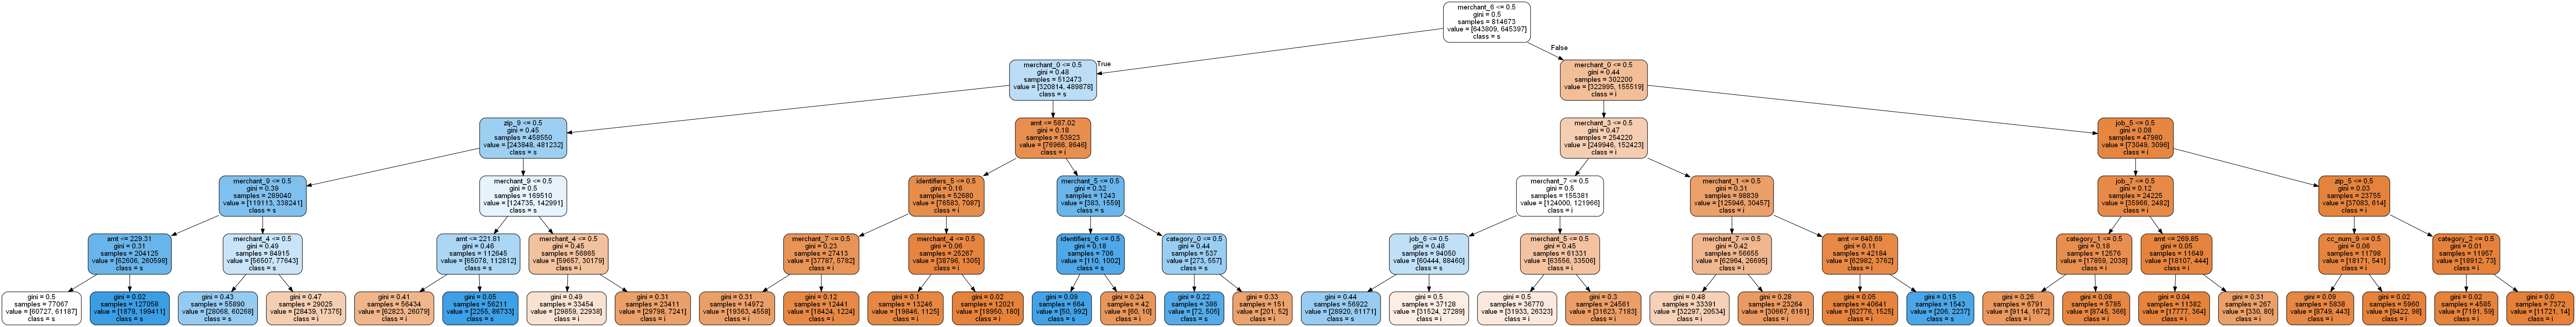

In [68]:
Image(filename = 'tree4.png')

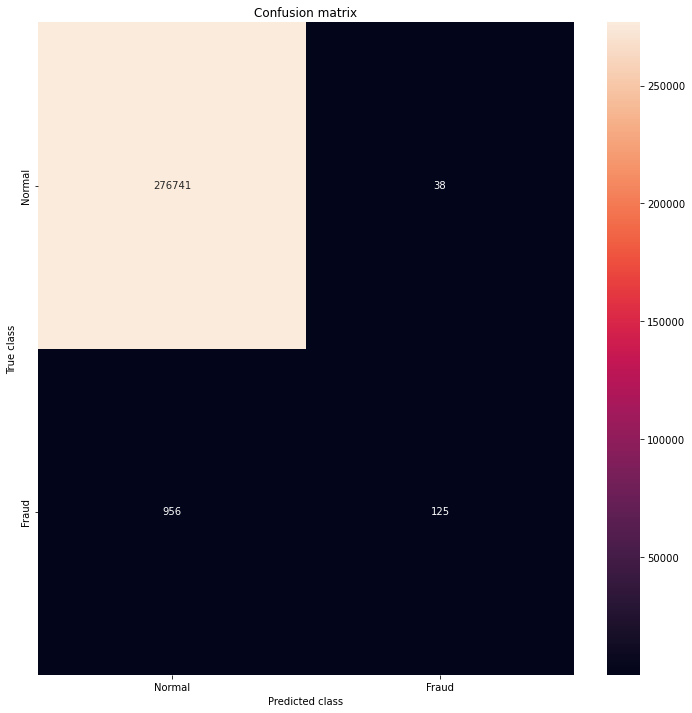

In [70]:
# visualizing a confusion matrix
y_pred = clf3.predict(X_test_binary)
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test_binary, y_pred)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [72]:
# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_test_binary, y_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

TPR Train :	 0.11563367252543941
TNR Train :	 0.9998627063469411

FPR Train :	 0.00013729365305893872
FNR Train :	 0.8843663274745606


# Explaining the scores

## `clf1`, `cl2`, and `clf3` all have high scores with the training dataset because:
* 1. The models were fitted on the training dataset and the predictions are very close to the training target predictors
* 2. The number of trees was quite large increasing accuracy

## Why were the scores on the test dataset were quite poor?
* 1. The models experienced overfitting. This happened because of the following reasons:
    * The total training dataset, whilst large in size was highly encoded meaning that there might have been possible predictors which were discounted
    * The training set encoded with category boost encoding utilized a target based encoding which was done before any balancing meaning that the very large number of 0 Values in the fraud category lowered the target means calculated reducing the relevance of certain features which might have been otherwise important

### The best out of the three classifiers was `clf3` which was conducted on the dataset encoded with binary encoding and resampled with SMOTE
* The test set performance scores were still not as good as one might have wanted. Whilst the precision and accuracy were relatively high, the recall and F1 scores were abysmal.
    * One explanation for this is the usage of SMOTE for resampling.
    * Whilst smote does a good job of oversampling, it doesn't add much to the dataset in terms of learning patterns. 
    * This is because most of the synthetic minority datapoints are very closely related to the original minority points.
    * Consequently, the machine learning model, in this case random forest classification, didn't really learn much from these points and was unable to properly detect fraud as we wanted it to.

# Learning Point:
### 1. When encoding, try and understand the effect of the encoding method on the data, and adjust encoding method accordingly
### 2. For resampling, SMOTE seems like a good idea but alternatives such as SMOTE with Tomek Links and SMOTE with Edited Nearest Neighbours might perform better 